## Import Libraries

In [10]:
import warnings
warnings.filterwarnings("ignore")
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
df = pd.read_csv('data_person.csv')
df.head()

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,...,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4,PERSONALITY
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,...,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0,extraverted
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,...,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0,serious
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,...,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0,dependable
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0,extraverted
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,...,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,lively


In [3]:
print('Shape of data is: %s entries and %s columns'%(df.shape[0],df.shape[1]))

Shape of data is: 1015341 entries and 21 columns


## Data Preprocessing

In [4]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1',
       'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2',
       'OPN3', 'OPN4', 'PERSONALITY'],
      dtype='object')


In [5]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2', 'OPN3', 'OPN4']


Categorical Columns in DF: 
 ['PERSONALITY']


### Missing Values

In [6]:
df.isnull().sum(axis=0)

EXT1           1783
EXT2           1783
EXT3           1783
EXT4           1783
EST1           1783
EST2           1783
EST3           1783
EST4           1783
AGR1           1783
AGR2           1783
AGR3           1783
AGR4           1783
CSN1           1783
CSN2           1783
CSN3           1783
CSN4           1783
OPN1           1783
OPN2           1783
OPN3           1783
OPN4           1783
PERSONALITY       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum(axis=0)

EXT1           0
EXT2           0
EXT3           0
EXT4           0
EST1           0
EST2           0
EST3           0
EST4           0
AGR1           0
AGR2           0
AGR3           0
AGR4           0
CSN1           0
CSN2           0
CSN3           0
CSN4           0
OPN1           0
OPN2           0
OPN3           0
OPN4           0
PERSONALITY    0
dtype: int64

### Uniques Categorical Values in DF

In [9]:
cat_col = df[['PERSONALITY']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

serious        230150
extraverted    214465
dependable     197294
lively         191557
responsible    180092
Name: PERSONALITY, dtype: int64



- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

## EDA

### Corr Between Numerical Columns

<AxesSubplot: >

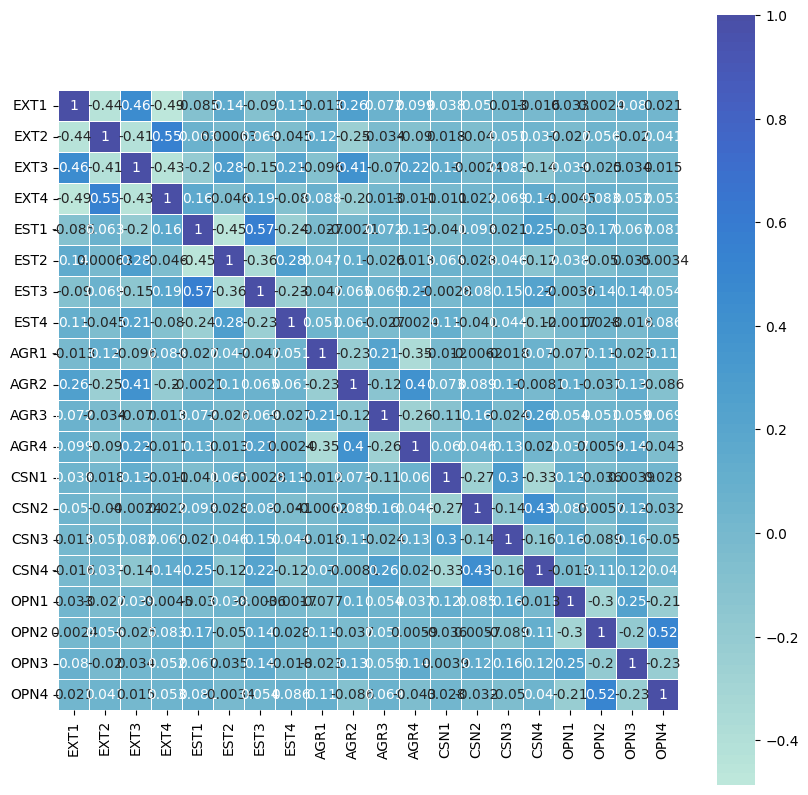

In [10]:
corr = df[['EXT1','EXT2','EXT3','EXT4','EST1','EST2','EST3','EST4','AGR1','AGR2','AGR3','AGR4','CSN1','CSN2','CSN3','CSN4','OPN1','OPN2','OPN3','OPN4']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

### Checking to see balance in the target variable

<AxesSubplot: xlabel='PERSONALITY', ylabel='count'>

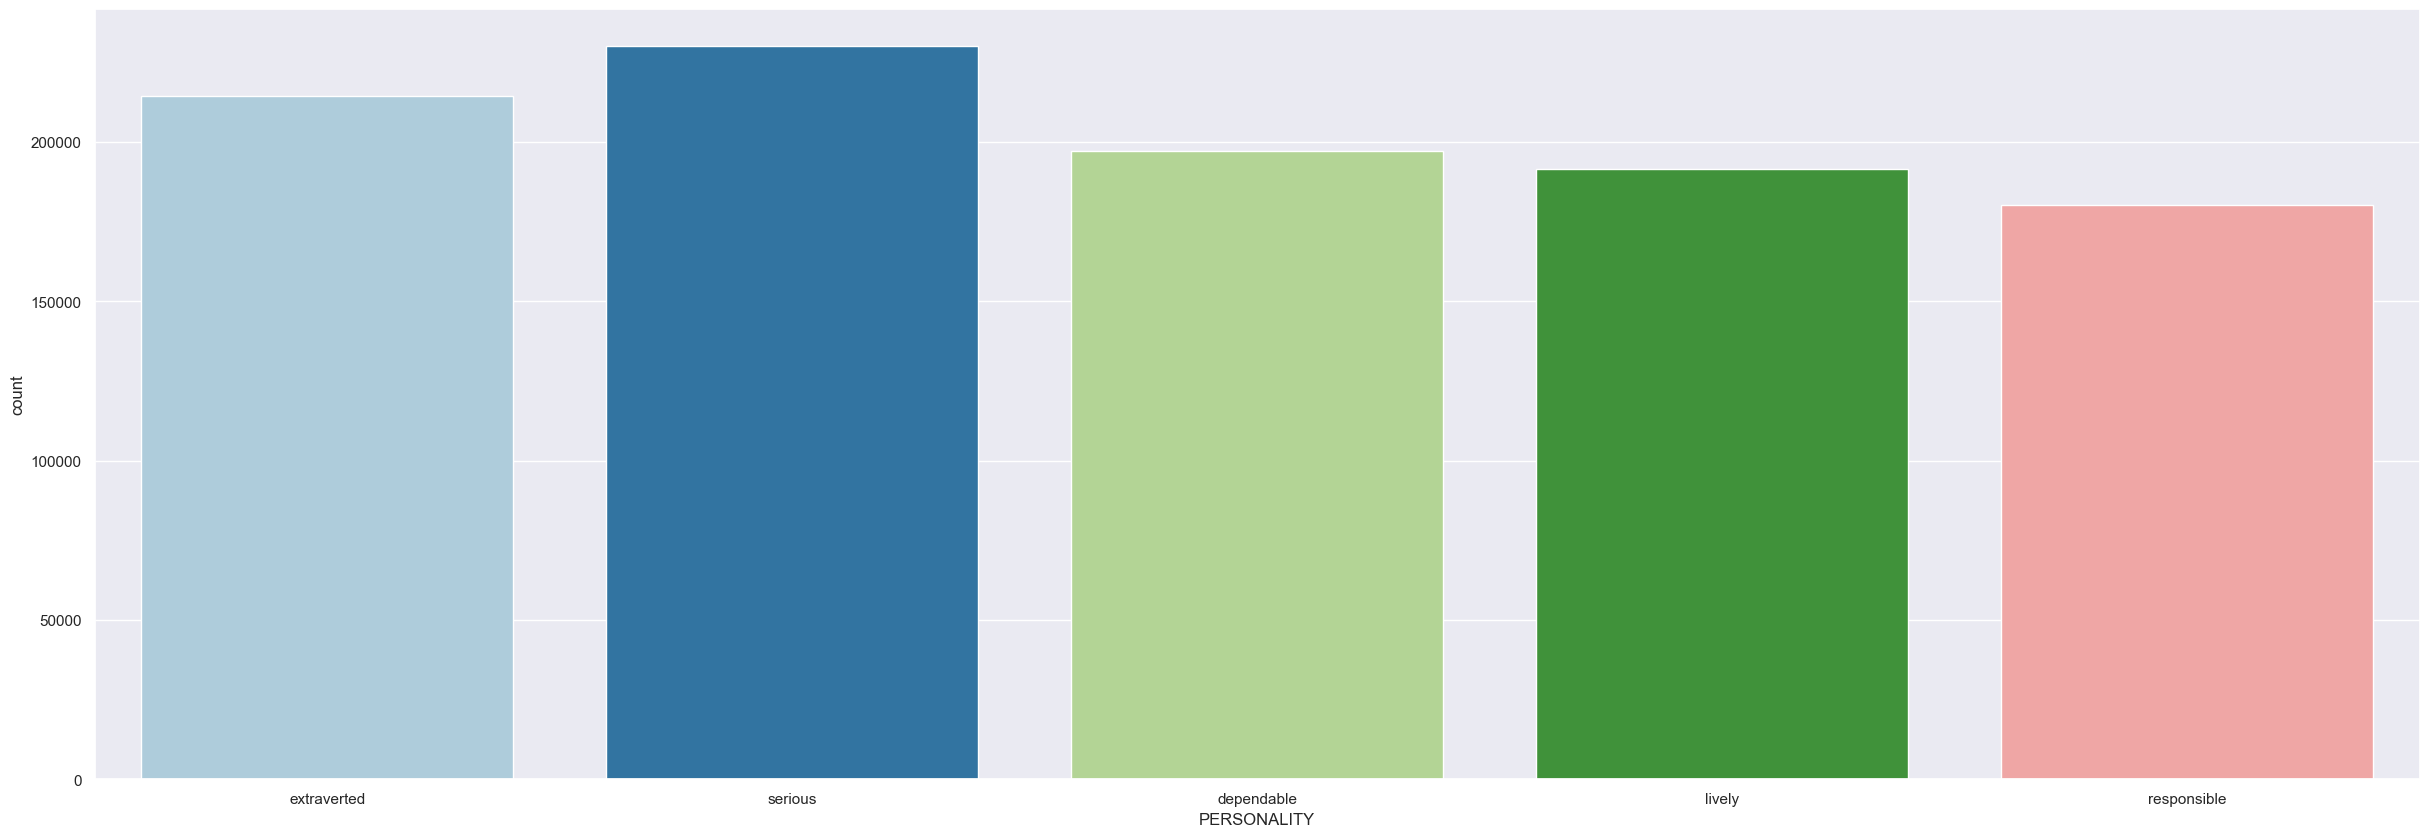

In [11]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x = df["PERSONALITY"], palette="Paired")

In [12]:
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,...,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4,PERSONALITY
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,...,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0,extraverted
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,...,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0,serious
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,...,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0,dependable
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0,extraverted
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,...,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,lively


### Convert all the columns from float to int

In [13]:
df['EXT1'] = df['EXT1'].astype(int)
df['EXT2'] = df['EXT2'].astype(int)
df['EXT3'] = df['EXT3'].astype(int)
df['EXT4'] = df['EXT4'].astype(int)
df['EST1'] = df['EST1'].astype(int)
df['EST2'] = df['EST2'].astype(int)
df['EST3'] = df['EST3'].astype(int)
df['EST4'] = df['EST4'].astype(int)
df['AGR1'] = df['AGR1'].astype(int)
df['AGR2'] = df['AGR2'].astype(int)
df['AGR3'] = df['AGR3'].astype(int)
df['AGR4'] = df['AGR4'].astype(int)
df['CSN1'] = df['CSN1'].astype(int)
df['CSN2'] = df['CSN2'].astype(int)
df['CSN3'] = df['CSN3'].astype(int)
df['CSN4'] = df['CSN4'].astype(int)
df['OPN1'] = df['OPN1'].astype(int)
df['OPN2'] = df['OPN2'].astype(int)
df['OPN3'] = df['OPN3'].astype(int)
df['OPN4'] = df['OPN4'].astype(int)

In [14]:
display(df.dtypes)

EXT1            int32
EXT2            int32
EXT3            int32
EXT4            int32
EST1            int32
EST2            int32
EST3            int32
EST4            int32
AGR1            int32
AGR2            int32
AGR3            int32
AGR4            int32
CSN1            int32
CSN2            int32
CSN3            int32
CSN4            int32
OPN1            int32
OPN2            int32
OPN3            int32
OPN4            int32
PERSONALITY    object
dtype: object

In [15]:
#df.to_csv('test.csv')

In [16]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2', 'OPN3', 'OPN4']


## Machine Learning Models to get best accuracy

In [17]:
feed = df[['EXT1','EXT2','EXT3','EXT4','EST1','EST2','EST3','EST4','AGR1','AGR2','AGR3','AGR4','CSN1','CSN2','CSN3','CSN4','OPN1','OPN2','OPN3','OPN4','PERSONALITY']]

# Choosing independent vars
df_train_x = feed.drop('PERSONALITY',axis = 1)

# Choosing all target vars
df_train_y = feed['PERSONALITY']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.10, random_state=42)

In [18]:
y_train = pd.DataFrame(y_train, columns = ["PERSONALITY"])
y_train.head()
y_test = pd.DataFrame(y_test, columns = ["PERSONALITY"])
y_test

,PERSONALITY
257675,extraverted
641203,dependable
20841,lively
641164,responsible
266356,responsible
...,...
566291,lively
107030,lively
238224,extraverted
933576,responsible


### Machine Learning Model Fittings

### 1. Decision Tree


In [19]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[3758 4081 3664 3544 4494]
 [4333 4479 4079 3853 4836]
 [3807 4013 3590 3474 4331]
 [3542 3695 3292 3233 4025]
 [4651 4894 4395 4091 5202]]
  
accuracy= 1.9990923082994594


### Data for single instance prediction

In [30]:
userdata = [['2','2','2','3','1','1','1','2','1','1','1','1','1','1','5','5','5','5','5','5']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['responsible']
Probabilities of all classes:  [[0. 0. 0. 1. 0.]]
Probability of Predicted class :  1.0


####

In [32]:
import pickle 
pickle.dump(dtree,open('personality_model.pkl','wb'))